In [50]:
import sys

import matplotlib.pyplot as plt

#import cv2
import cv2
from deepfly.GUI.os_util import *
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import Axes3D
from deepfly.GUI.CameraNetwork import CameraNetwork
import deepfly.GUI.skeleton as skeleton
import pickle
import glob
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
image_folder = '/data/accuracy/001_SG1/behData/images/'

calib = read_calib(image_folder)
num_cameras = skeleton.num_cameras

heatmap_path_man = '/data/accuracy/001_SG1/behData/images/heatmap__manual.pkl'
pred_path_man = '/data/accuracy/001_SG1/behData/images/preds__manual.pkl'

cid2cidread, cidread2cid = read_camera_order(image_folder)
#pred_path_gt = '/data/accuracy/001_SG1/behData/images/preds_-data-accuracy-001_SG1-behData-images.pkl'
#heatmap_path_gt = '/data/accuracy/001_SG1/behData/images/heatmap_-data-accuracy-001_SG1-behData-images.pkl'

pred_path_gt = pred_path_man
heatmap_path_gt = heatmap_path_man

camNetGT = CameraNetwork(image_folder=image_folder, num_images=None, cam_id_list=np.arange(num_cameras), calibration=calib, cid2cidread=cid2cidread, hm_path=heatmap_path_gt, pred_path=pred_path_gt)

d = pickle.load(open(glob.glob(os.path.join(image_folder, 'pose_result*.pkl'))[0], 'rb'))
for cam in camNetGT:
    cam.points2d = d["points2d"][cam.cam_id, :]
camNetGT[3].points2d[632:, 7,:] = camNetGT[3].points2d[631, 7, :] 
camNetGT[3].points2d[:140, 7,:] = camNetGT[3].points2d[0, 7, :]

camNetMan = CameraNetwork(image_folder=image_folder, num_images=None, cam_id_list=np.arange(num_cameras), calibration=calib, cid2cidread=cid2cidread, hm_path=heatmap_path_man, pred_path=pred_path_man)

Loading predictions ['/data/accuracy/001_SG1/behData/images/preds__manual.pkl']
Loading heatmaps ['/data/accuracy/001_SG1/behData/images/heatmap__manual.pkl']
Heatmap shape: (8, 900, 19, 64, 128)
Number of points close to prior epipolar line: 31934.0
Loading predictions ['/data/accuracy/001_SG1/behData/images/preds__manual.pkl']
Loading heatmaps ['/data/accuracy/001_SG1/behData/images/heatmap__manual.pkl']
Heatmap shape: (8, 900, 19, 64, 128)
Number of points close to prior epipolar line: 31934.0


In [3]:
'''
cam3_pts2d = np.zeros_like(camNetGT[3].points2d)
for img_id in range(900):
    if img_id%50==0:
        print(img_id)
    pts_bp = camNetMan.solveBP(img_id, skeleton.bone_param, prior=[])
    pts_bp = np.array(pts_bp) * [960,480]
    cam3_pts2d[img_id, :] = pts_bp[3]
np.save('/home/user/Desktop/cam3_pts2d', cam3_pts2d)
'''

0
Joints [15] is not visible from at least two cameras
Joints [16, 17, 18] is not visible from at least two cameras
Joints [34] is not visible from at least two cameras
Joints [35, 36, 37] is not visible from at least two cameras
[[7, 7, 25, 25, 25], [7, 7, 44, 25, 25], [7, 7, 14, 9, 14], [7, 7, 25, 25, 25], [7, 7, 25, 25, 44], [7, 7, 8, 16, 16]]
Joints [15] is not visible from at least two cameras
Joints [16, 17, 18] is not visible from at least two cameras
Joints [34] is not visible from at least two cameras
Joints [35, 36, 37] is not visible from at least two cameras
[[8, 7, 25, 25, 25], [7, 7, 76, 25, 25], [7, 7, 14, 8, 16], [7, 7, 25, 25, 25], [7, 8, 25, 25, 25], [7, 7, 8, 16, 16]]
Joints [15] is not visible from at least two cameras
Joints [16, 17, 18] is not visible from at least two cameras
Joints [34] is not visible from at least two cameras
Joints [35, 36, 37] is not visible from at least two cameras
[[8, 7, 25, 25, 25], [7, 7, 25, 25, 25], [7, 7, 14, 8, 16], [7, 7, 25, 25, 2

KeyboardInterrupt: 

In [53]:
cam3_pts2d = np.load('/data/accuracy/cam3_pts2d.npy')

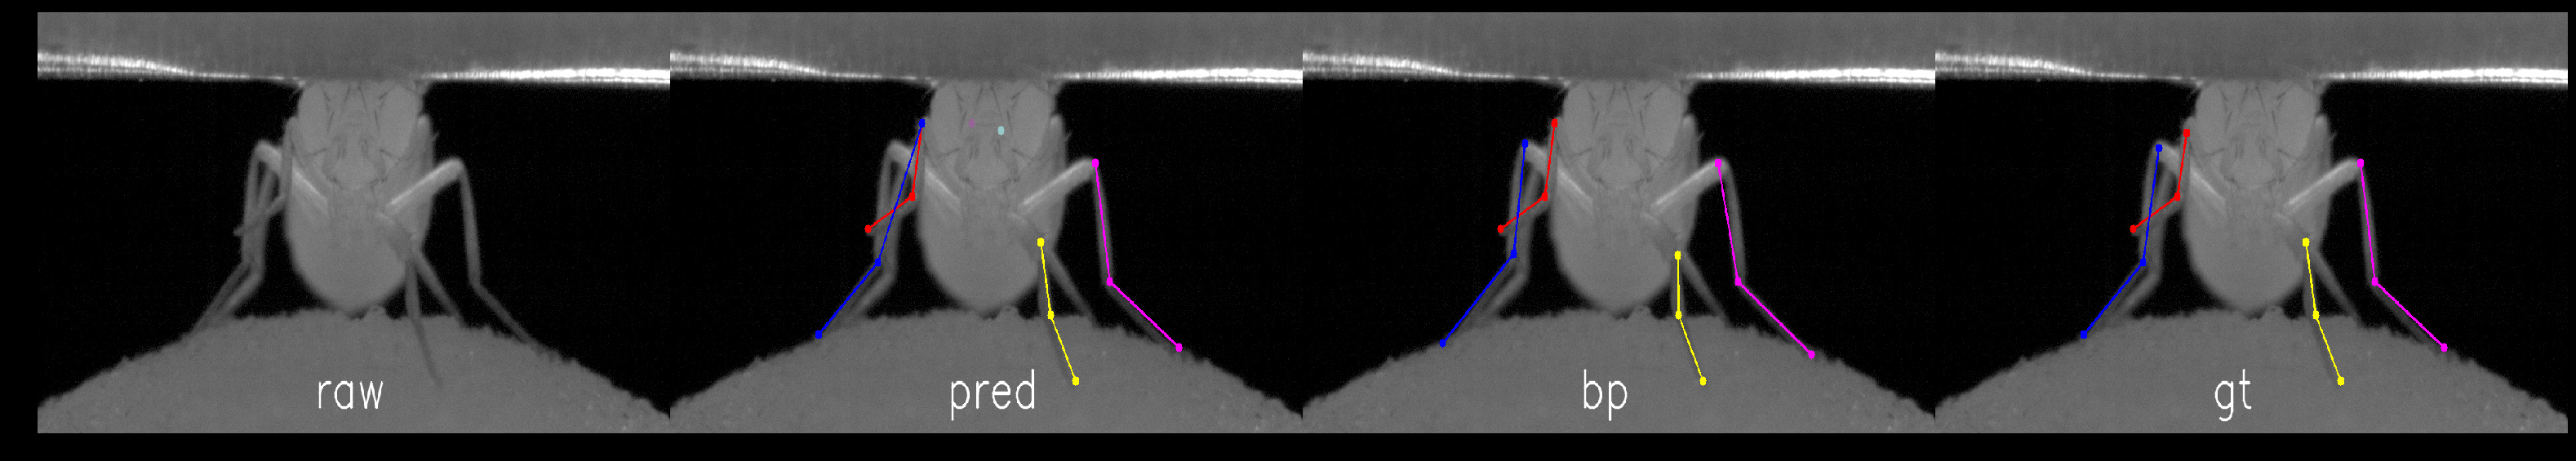

In [54]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(40,10))
ax = plt.imshow(np.zeros((480,960*3)))
plt.axis('off')
for img_id in range(150,151):
    raw = camNetGT[3].get_image(img_id=img_id)
    pred = camNetMan[3].plot_2d(img_id=img_id)
    pred_bp = camNetMan[3].plot_2d(img_id=img_id, pts=cam3_pts2d[img_id])
    gt = camNetGT[3].plot_2d(img_id=img_id)

    text_list = ['raw', 'pred', 'bp', 'gt']
    img_list = [raw, pred, pred_bp, gt]
    for img, text in zip(img_list, text_list):
        img = cv2.putText(img, text,(420,450), cv2.FONT_HERSHEY_SIMPLEX, 2,(255,255,255),2,cv2.LINE_AA)

    img = np.concatenate(img_list, axis=1)
    ax.set_data(img)
    #fig.savefig('/home/user/Desktop/tmp/accuracy/{}.jpg'.format(img_id))
    #cv2.imwrite('/home/user/Desktop/tmp/accuracy/{}.jpg'.format(img_id), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Histogram of errors

(900,) (900,)


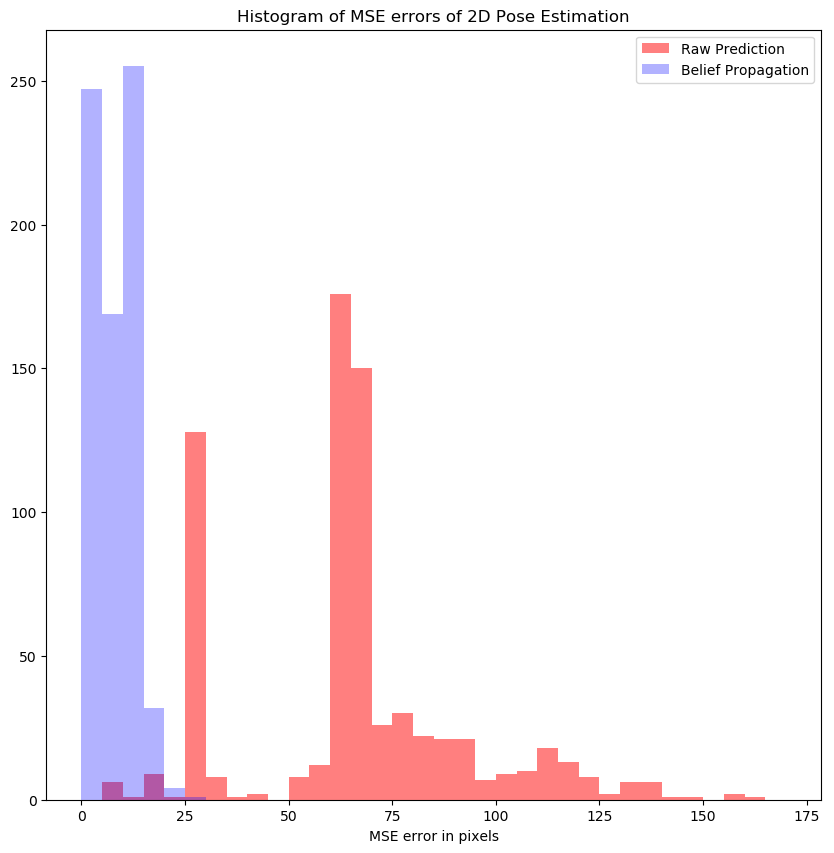

In [10]:
plt.style.use('default')
plt.figure(figsize=(10,10))
cam_id = 3
#err_joint_list = [j for j in range(skeleton.num_joints) if skeleton.camera_see_joint(cam_id, j)]
err_joint_list = [7]
pred_error = camNetMan[cam_id].points2d[:, err_joint_list, :] - camNetGT[cam_id].points2d[:, err_joint_list, :]
pred_error = np.sqrt(np.sum(pred_error**2, axis=-1))
mask = pred_error>5
bp_error = cam3_pts2d[:, err_joint_list,:] - camNetGT[cam_id].points2d[:, err_joint_list, :]
bp_error = np.sqrt(np.sum(bp_error**2, axis=-1))

print(pred_error.ravel().shape, bp_error.ravel().shape)
bins = np.arange(0,175,5)
a,b,c = plt.hist(pred_error[mask].ravel(), bins=bins, alpha=0.5, label='Raw Prediction', color='red')
a_,b_,c_=plt.hist(bp_error[mask].ravel(), bins=bins, alpha=0.3, label='Belief Propagation', color='blue')
plt.xlabel('MSE error in pixels')
plt.title('Histogram of MSE errors of 2D Pose Estimation')
plt.legend()

(-160.58467940648063, 160.58467940648063)

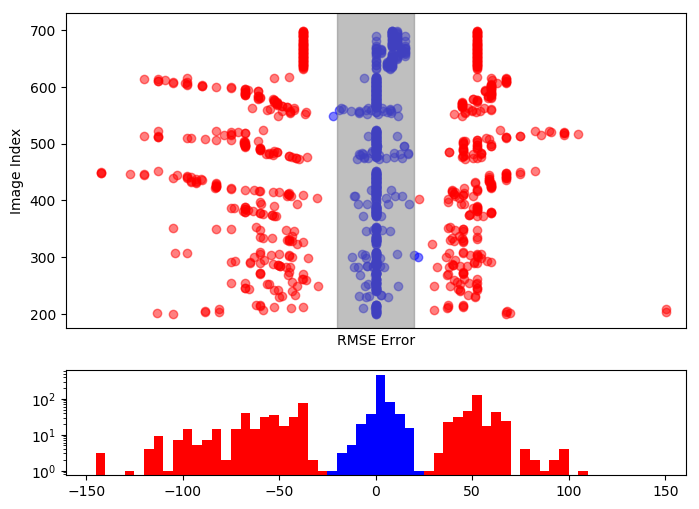

In [65]:
from matplotlib import gridspec
plt.style.use('default')

pred_error = camNetMan[cam_id].points2d[:, err_joint_list, :] - camNetGT[cam_id].points2d[:, err_joint_list, :]
bp_error = cam3_pts2d[:, err_joint_list,:] - camNetGT[cam_id].points2d[:, err_joint_list, :]
mask = np.abs(pred_error)>20

blue_list = list()
red_list = list()

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


#fig, (ax1,ax2) = plt.subplots(2,1)

for img_id in range(200, bp_error.shape[0]-200):
    if mask[img_id,0,0]:
        ax1.scatter(x=pred_error[img_id,0,0], y=img_id, color='red', alpha=0.5,)
        ax1.scatter(x=pred_error[img_id,0,1], y=img_id, color='red', alpha=0.5,)       
        ax1.scatter(x=bp_error[img_id,0,0], y=img_id, color='blue', alpha=0.5,)
        ax1.scatter(x=bp_error[img_id,0,1], y=img_id, color='blue', alpha=0.5,)
        blue_list.append(pred_error[img_id,0,0])
        blue_list.append(pred_error[img_id,0,1])
        red_list.append(bp_error[img_id,0,0])
        red_list.append(bp_error[img_id,0,1])
        
ax1.axvspan(-20, 20, alpha=0.5, color='gray')
ax1.set_ylabel('Image Index')
ax1.set_xlabel('RMSE Error')
ax1.set_xticks([])
extend = np.max(np.abs(pred_error)) + 10
ax1.set_xlim([-extend,extend])

ax2.hist(blue_list, bins=np.arange(-150,150,5), color='red')
ax2.hist(red_list, bins=np.arange(-150,150,5), color='blue')
#ax2.set_ylim([0,500])
ax2.set_yscale('log')
ax2.set_xlim([-extend,extend])

(0, 500)

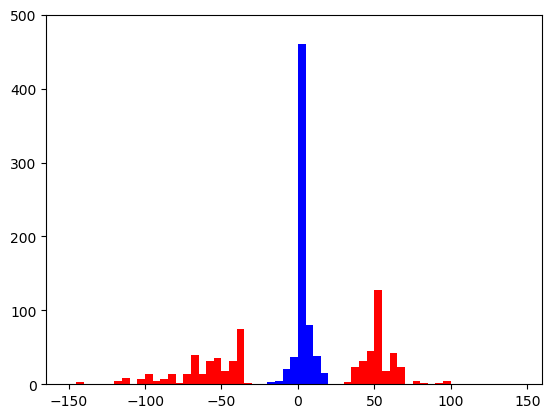

In [61]:
plt.hist(blue_list, bins=np.arange(-150,150,5), color='red')
plt.hist(red_list, bins=np.arange(-150,150,5), color='blue')
plt.ylim([0,500])

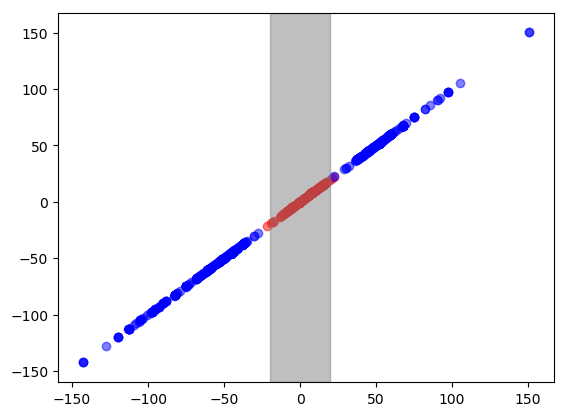

In [26]:
pred_error = camNetMan[cam_id].points2d[:, err_joint_list, :] - camNetGT[cam_id].points2d[:, err_joint_list, :]
bp_error = cam3_pts2d[:, err_joint_list,:] - camNetGT[cam_id].points2d[:, err_joint_list, :]
mask = np.abs(pred_error)>20

for img_id in range(bp_error.shape[0]):
    if mask[img_id,0,0]:
        plt.scatter(x=pred_error[img_id,0,0], y=pred_error[img_id,0,0], alpha=0.5, color='blue')
        plt.scatter(x=pred_error[img_id,0,1], y=pred_error[img_id,0,1], alpha=0.5, color='blue')       
        plt.scatter(x=bp_error[img_id,0,0], y=bp_error[img_id,0,0], alpha=0.5, color='red')
        plt.scatter(x=bp_error[img_id,0,1], y=bp_error[img_id,0,1], alpha=0.5, color='red')
        
plt.axvspan(-20, 20, alpha=0.5, color='gray')